In [1]:
# Loading library.
import numpy as np
import pandas as pd

# for visualization.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('tableau-colorblind10')

In [2]:
data = pd.read_csv("../input/breastcancerdataset/BRCA.csv")
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [3]:
data.shape

(341, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [5]:
# Valuecounts.

for col in data.select_dtypes(object):
    
    print("---"*10)
    print(data[col].value_counts())

------------------------------
TCGA-D8-A1JJ    1
TCGA-E2-A1IG    1
TCGA-A8-A06P    1
TCGA-BH-A0HI    1
TCGA-BH-A0BV    1
               ..
TCGA-D8-A1JH    1
TCGA-A8-A06O    1
TCGA-AR-A1AK    1
TCGA-BH-A0DS    1
TCGA-AC-A5XS    1
Name: Patient_ID, Length: 334, dtype: int64
------------------------------
FEMALE    330
MALE        4
Name: Gender, dtype: int64
------------------------------
II     189
III     81
I       64
Name: Tumour_Stage, dtype: int64
------------------------------
Infiltrating Ductal Carcinoma     233
Infiltrating Lobular Carcinoma     89
Mucinous Carcinoma                 12
Name: Histology, dtype: int64
------------------------------
Positive    334
Name: ER status, dtype: int64
------------------------------
Positive    334
Name: PR status, dtype: int64
------------------------------
Negative    305
Positive     29
Name: HER2 status, dtype: int64
------------------------------
Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy  

In [6]:
# missing data.
data.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [7]:
data.loc[data.Patient_ID.isnull()]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop columns with all NaN values.
data.dropna(how='all', inplace=True)

In [9]:
# Check shape after removing null values.
data.shape

(334, 16)

In [10]:
# Change datatype of dates in datetime.
data['Date_of_Surgery'] = pd.to_datetime(data.Date_of_Surgery, format="%d-%b-%y") # format for 15-Jan-17
data['Date_of_Last_Visit'] = pd.to_datetime(data.Date_of_Last_Visit, format="%d-%b-%y")

In [11]:
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead


In [12]:
data.tail()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
329,TCGA-AN-A04A,36.0,FEMALE,0.23180,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,2019-11-11,2020-02-09,Dead
330,TCGA-A8-A085,44.0,MALE,0.73272,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,2019-11-01,2020-03-04,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.71947,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2019-11-11,2021-01-18,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.47940,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,2019-11-21,2021-02-19,Dead
333,TCGA-B6-A40B,76.0,FEMALE,-0.24427,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2019-11-11,2021-01-05,Dead


In [13]:
# Examine the Age of Patients.
data['Age'] = data.Age.astype(int)
bins =[0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10s','20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

data['AgeGrp']=pd.cut(data.Age, labels=labels, bins=bins, right=False)

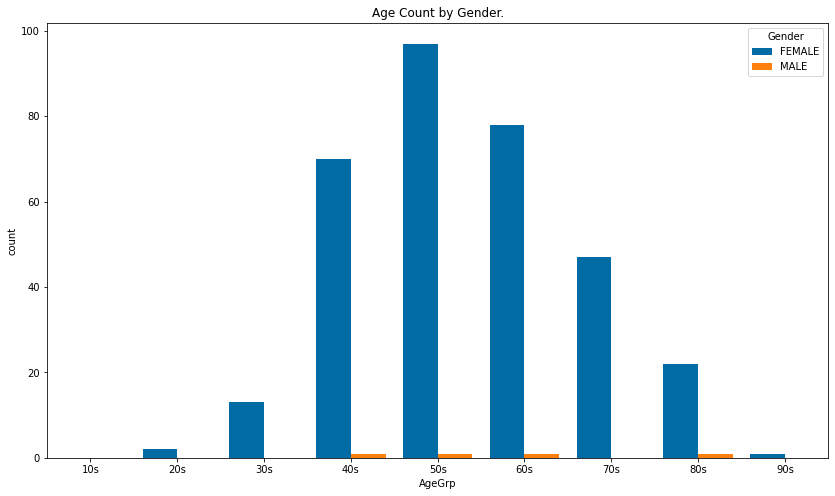

In [14]:
plt.figure(figsize=(14, 8))
sns.countplot(x='AgeGrp', hue='Gender', data=data, saturation=1.2)

plt.title("Age Count by Gender.")
plt.show()

Breast Cancer is common in Females than Males.

In [15]:
# Examine Proteins values.
a = data.groupby(by=['Tumour_Stage']).mean()[['Protein1','Protein2','Protein3','Protein4']]
a

,Protein1,Protein2,Protein3,Protein4
Tumour_Stage,,,,
I,-0.014430,1.001318,-0.165147,0.037828
II,-0.007734,0.964763,-0.065409,0.018023
III,-0.094220,0.862207,-0.088845,-0.031453


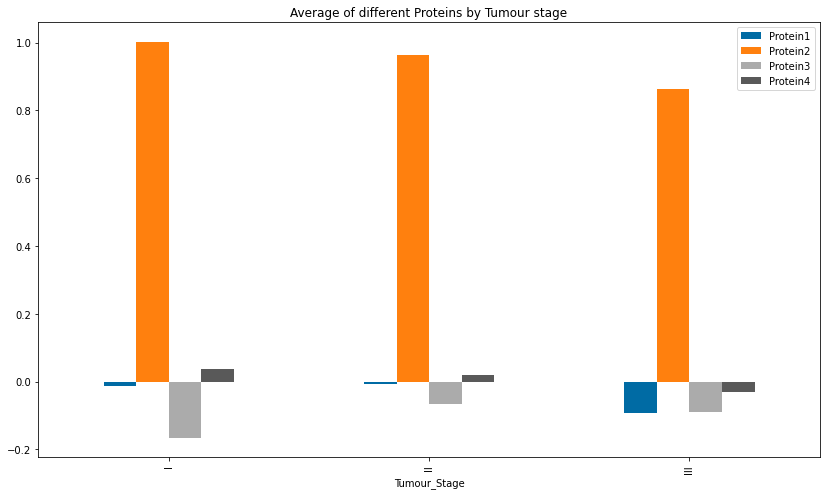

In [16]:
# Visualization for the same.
a.plot(kind='bar', figsize=(14, 8))

plt.title("Average of different Proteins by Tumour stage")
plt.show()

Proteins are found on tissues while testing. Protein 2 is common in all stages of Breast Cancer.

In [17]:
a = pd.DataFrame(data.groupby(['Tumour_Stage', 'Histology']).count()['Patient_ID'])
a

Patient_ID
Tumour_Stage Histology                                 
I            Infiltrating Ductal Carcinoma           50
             Infiltrating Lobular Carcinoma          11
             Mucinous Carcinoma                       3
II           Infiltrating Ductal Carcinoma          124
             Infiltrating Lobular Carcinoma          56
             Mucinous Carcinoma                       9
III          Infiltrating Ductal Carcinoma           59
             Infiltrating Lobular Carcinoma          22

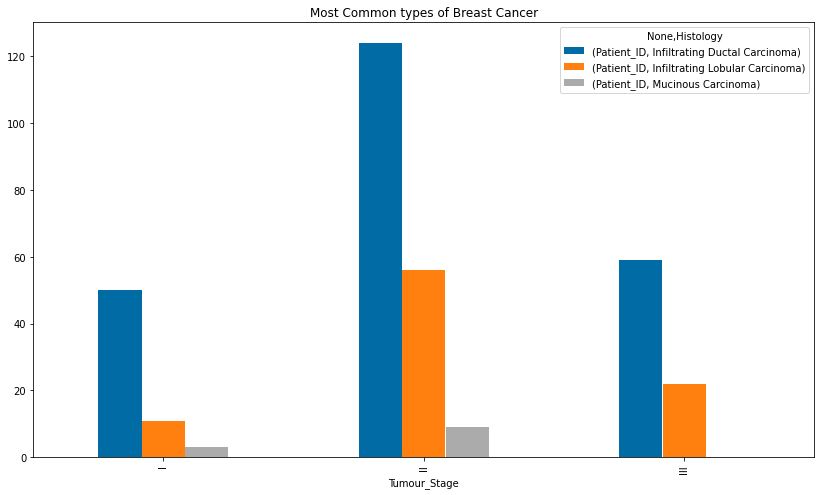

In [18]:
# visualization
a.unstack().plot(kind='bar', figsize=(14, 8), title="Most Common types of Breast Cancer",)
plt.show()

Most common type of Breast cancer in all stages is **Infiltrating Ductal Carcinoma**. There are no observation for Mucinous Carcinoma type of cancer in Third stage of cancer.

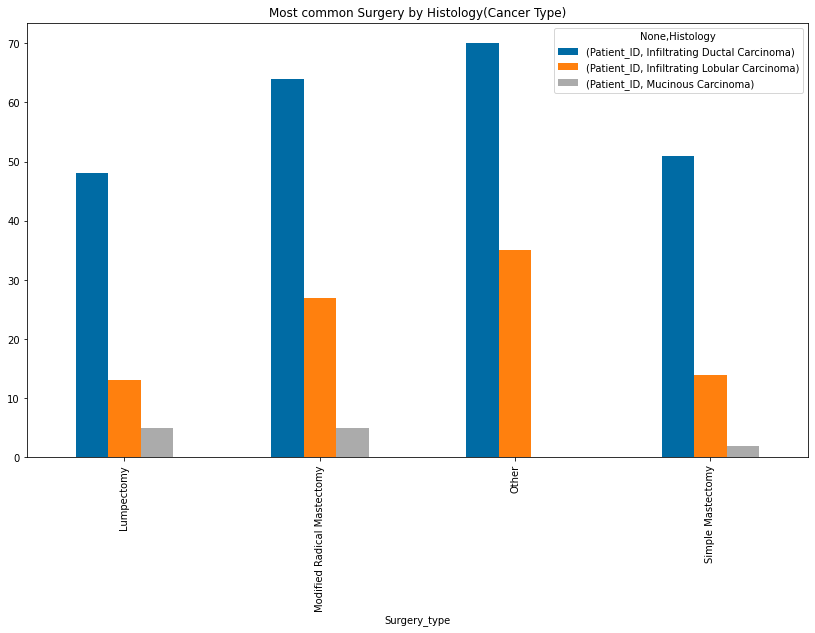

In [19]:
# Observation for Surgery types
a = pd.DataFrame(data.groupby(['Surgery_type', 'Histology']).count()['Patient_ID'])
# print(a)

# plot

a.unstack().plot(kind='bar', figsize=(14, 8), title='Most common Surgery by Histology(Cancer Type)')
plt.show()

Type of Surgery for **Other** is not specified. But it occurs most of the times as compare to others. After **other** common type of surgery is **Modified Radical Masterctomy** for all type of tumours.

In [20]:
# Patient_Status obeservations.
a = pd.DataFrame(data.groupby(['Surgery_type','Patient_Status']).count()['Patient_ID'])
a

Patient_ID
Surgery_type                Patient_Status            
Lumpectomy                  Alive                   57
                            Dead                     9
Modified Radical Mastectomy Alive                   72
                            Dead                    20
Other                       Alive                   73
                            Dead                    25
Simple Mastectomy           Alive                   53
                            Dead                    12

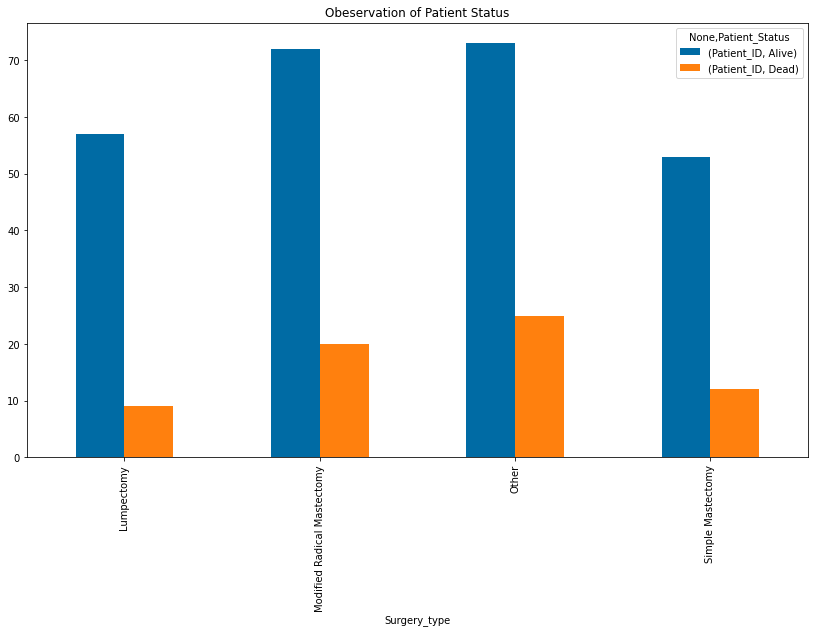

In [21]:
a.unstack().plot(kind='bar',figsize=(14, 8))

plt.title("Obeservation of Patient Status")
plt.show()

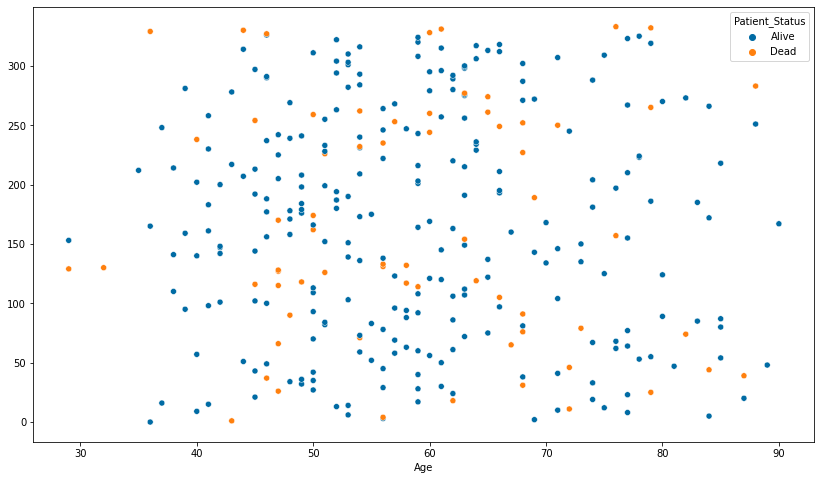

In [22]:
# Patient Status visualization by age.
plt.figure(figsize=(14, 8))

sns.scatterplot(x='Age',y=data.index, hue='Patient_Status',data=data)

plt.show()

In [23]:
a = pd.DataFrame((data.groupby(by=['Surgery_type', 'Patient_Status']).count()['Patient_ID']/ data.groupby(by=['Surgery_type']).count()['Patient_ID']) * 100)
a['Patient_ID'] = a.Patient_ID.round(2)
a

Patient_ID
Surgery_type                Patient_Status            
Lumpectomy                  Alive                86.36
                            Dead                 13.64
Modified Radical Mastectomy Alive                75.00
                            Dead                 20.83
Other                       Alive                69.52
                            Dead                 23.81
Simple Mastectomy           Alive                79.10
                            Dead                 17.91

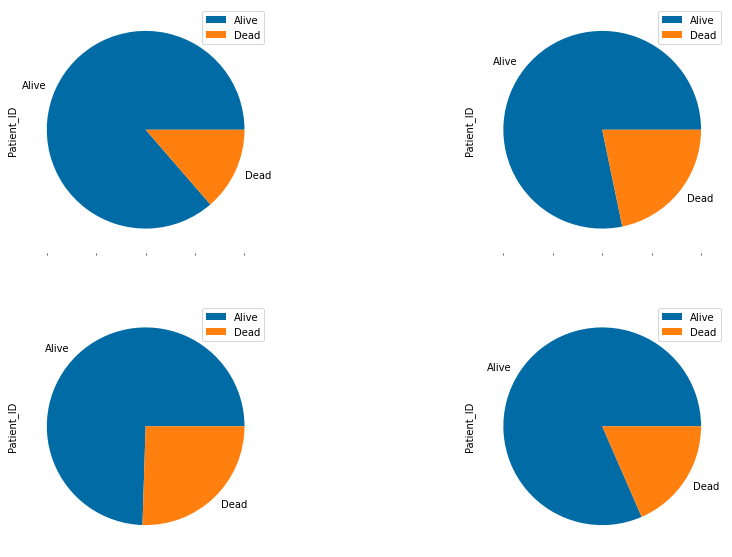

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, code in zip(axs.flat, a.index.levels[0]):
    a.xs(code).plot(kind='pie', subplots=True, ax=ax, xlabel=code, sharex=True)
    

plt.show()

In [25]:
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,AgeGrp
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive,30s
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead,40s
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive,60s
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive,50s
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead,50s


In [26]:
data.corr()

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.050638,-0.021542,-0.039686,0.094214
Protein1,-0.050638,1.000000,0.238141,-0.129482,0.280343
Protein2,-0.021542,0.238141,1.000000,-0.415825,0.088239
Protein3,-0.039686,-0.129482,-0.415825,1.000000,0.065316
Protein4,0.094214,0.280343,0.088239,0.065316,1.000000


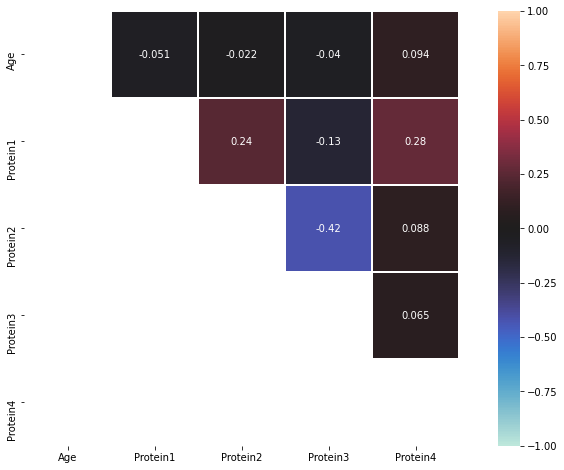

In [27]:
matrix = np.tril(data.corr())
plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), annot=True, fmt="0.2g", vmin = -1, vmax=1, center=0, square=True, mask=matrix,linewidth=0.3)

plt.show()